In [1]:
import math
import os
import scipy
from scipy.optimize import lsq_linear
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, halfnorm
import random
from scipy.io import loadmat
import random
import pickle
import sys
sys.path.append(r"c:\Users\katie\OneDrive\Documents\GitHub\trial")
import PCA_Regress as pcar

In [2]:
base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_neu.pkl', "rb") as input_file:
    J_pickle = pickle.load(input_file)
del input_file



base_path =r"c:\Users\katie\OneDrive\Desktop\Thesis"
with open(base_path+'\J_mus.pkl', "rb") as input_file:
    J_pickle_m = pickle.load(input_file)
del input_file

# base_path = "/Users/kb6113/Desktop/Thesis"
# with open(base_path+'/J_neu.pkl', "rb") as input_file:
#     J_pickle = pickle.load(input_file)
# del input_file

# with open(base_path+'/J_mus.pkl', "rb") as input_file:
#     J_pickle_m = pickle.load(input_file)
# del input_file

J_all_tensor = J_pickle['J_all']['interpPSTH']
J_all_PSTH = pcar.shape_matrix(J_all_tensor)
J_all_PSTH_scaled = pcar.scaling(J_all_tensor)

J_mus_tensor = J_pickle_m['interpPSTH']
J_mus_PSTH = pcar.shape_matrix(J_mus_tensor)
J_mus_PSTH_scaled = pcar.scaling(J_mus_tensor)
J_mus_stack = np.vstack((J_mus_tensor, J_mus_tensor, J_mus_tensor, J_mus_tensor))
print(J_mus_tensor.shape)
print(J_all_tensor.shape)

_, sing, _ = pcar.run_PCA(J_all_PSTH_scaled, 6)
print(sing.shape)


(27, 32, 236)
(108, 202, 236)
(202, 6)


<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
<>:2: SyntaxWarning: invalid escape sequence '\J'
<>:9: SyntaxWarning: invalid escape sequence '\J'
C:\Users\katie\AppData\Local\Temp\ipykernel_21836\3055207584.py:2: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_neu.pkl', "rb") as input_file:
C:\Users\katie\AppData\Local\Temp\ipykernel_21836\3055207584.py:9: SyntaxWarning: invalid escape sequence '\J'
  with open(base_path+'\J_mus.pkl', "rb") as input_file:


In [3]:
# J_mus_stack = np.vstack((J_mus_PSTH, J_mus_PSTH, J_mus_PSTH, J_mus_PSTH))
# J_mus_mc = J_mus_stack - np.mean(J_mus_stack, axis = 0)
# J_all_mc = J_all_PSTH - np.mean(J_all_PSTH, axis = 0)


W, M_hat, M_hat_recon, R_squared, MSE, rank_N  = pcar.fig_4(J_all_tensor, J_mus_stack)




>>> best_lam returning: 162.3776739188721


In [4]:


print(W)
print(MSE)
print(R_squared)
U, S_val, V = np.linalg.svd(W)

w_null = scipy.linalg.null_space(W.T)
print(U[:,:3])
print(w_null)
print(U[:,3:])

[[ 0.08872634 -0.01563373 -0.01964594]
 [-0.39290862 -0.03868428  0.07398194]
 [-0.43837317  0.17666242 -0.01253472]
 [ 0.13564258  0.07031281 -0.02065126]
 [-0.11163121 -0.11017506 -0.06865717]
 [ 0.16839509  0.08697427 -0.05029801]]
0.17418621023998862
[0.3545241  0.9361265  0.97462022]
[[-0.14050306  0.03112165 -0.1352004 ]
 [ 0.60834772  0.30720962  0.36273124]
 [ 0.6936517  -0.6231101  -0.26046082]
 [-0.20292714 -0.34190955 -0.01934143]
 [ 0.15162105  0.45836914 -0.84617937]
 [-0.25465838 -0.43518167 -0.25673612]]
[[ 0.0247065  -0.96255901 -0.1840677 ]
 [ 0.34592179 -0.21430089  0.48823621]
 [-0.11302198 -0.04587873 -0.21877489]
 [ 0.90561497  0.06918053 -0.12891832]
 [ 0.18989374  0.10444069  0.06262402]
 [-0.1037094  -0.09877557  0.81199775]]
[[ 0.0247065  -0.96255901 -0.1840677 ]
 [ 0.34592179 -0.21430089  0.48823621]
 [-0.11302198 -0.04587873 -0.21877489]
 [ 0.90561497  0.06918053 -0.12891832]
 [ 0.18989374  0.10444069  0.06262402]
 [-0.1037094  -0.09877557  0.81199775]]


>>> best_lam returning: 297.63514416313194


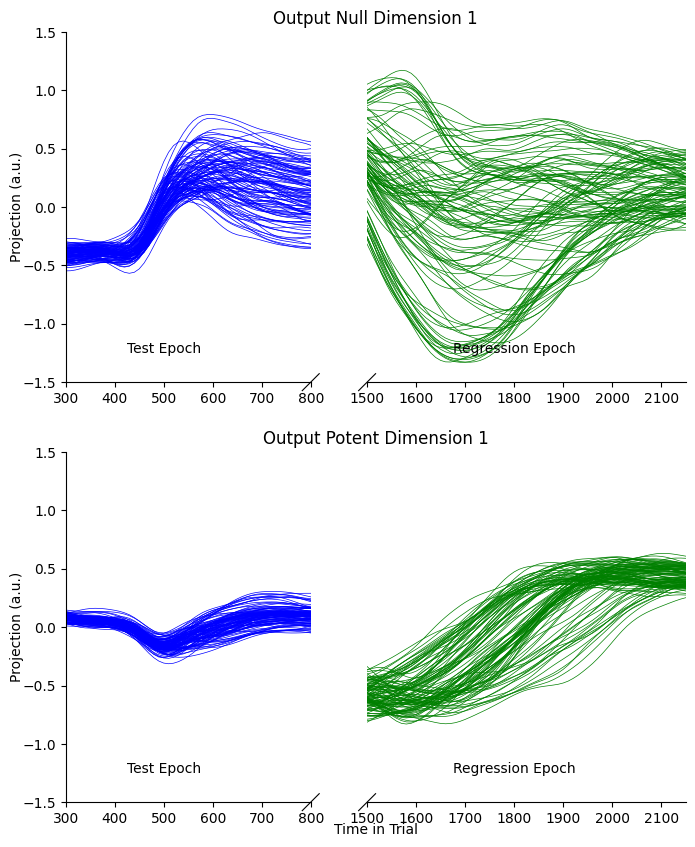

(array([[ 0.08899491, -0.01663862, -0.01964897],
        [-0.3810372 , -0.04172704,  0.07193443],
        [-0.42518991,  0.16495851, -0.0115406 ],
        [ 0.11926824,  0.05187991, -0.01681294],
        [-0.10301627, -0.09605357, -0.06423274],
        [ 0.14813548,  0.06228617, -0.04389472]]),
 array([[-0.53286676,  0.16298782,  0.04980399],
        [-0.5165532 ,  0.16674183,  0.05325947],
        [-0.50300325,  0.17003587,  0.05653031],
        ...,
        [ 0.42349952, -0.14919663,  0.07412051],
        [ 0.42211373, -0.15133124,  0.07077842],
        [ 0.41986938, -0.15305472,  0.06792799]], shape=(7128, 3)),
 array([[ 0.16970583,  0.13993861, -0.01842841, ...,  0.0991223 ,
          0.02093953, -0.12944387],
        [ 0.16569169,  0.13585181, -0.01465854, ...,  0.09675807,
          0.02072993, -0.1293128 ],
        [ 0.16239444,  0.13245483, -0.01147791, ...,  0.09483166,
          0.02058347, -0.12934621],
        ...,
        [-0.13208744, -0.11435582,  0.00115624, ..., -0.070

In [7]:
pcar.fig_4(J_all_tensor, J_mus_stack, plot = True, basis = 0)

>>> best_lam returning: 297.63514416313194


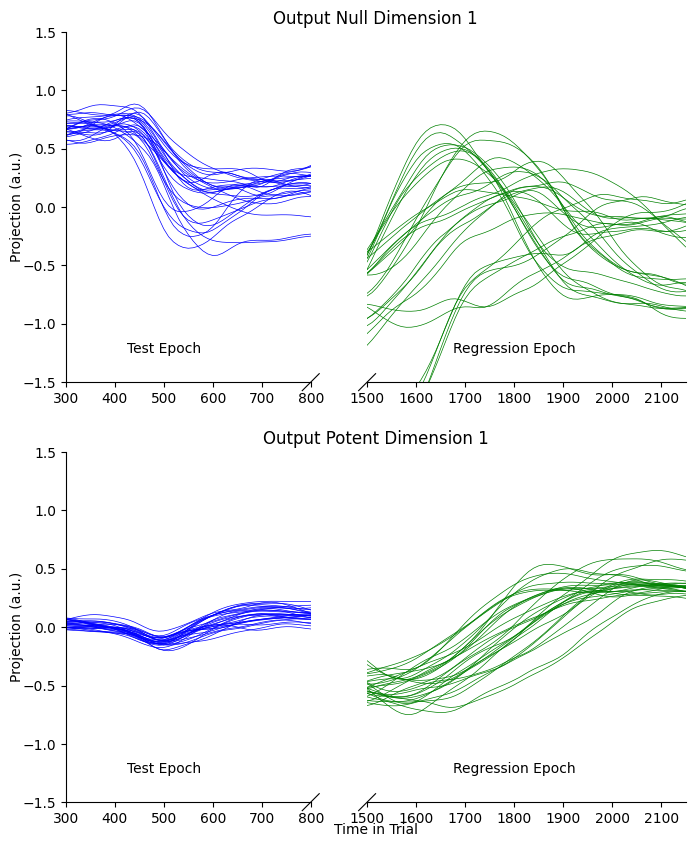

(array([[ 0.06519514, -0.0232357 , -0.0199598 ],
        [-0.18348512,  0.0275346 ,  0.11065056],
        [-0.37690809,  0.08769768, -0.04028772],
        [-0.04149281, -0.02701429, -0.00336987],
        [ 0.22037801,  0.1068308 ,  0.03707794],
        [ 0.00801616,  0.04199943,  0.00282283]]),
 array([[-0.46167552,  0.13789183, -0.02768071],
        [-0.44775589,  0.13430606, -0.03314773],
        [-0.43484269,  0.13115201, -0.0372939 ],
        ...,
        [ 0.31122658, -0.04392288, -0.15442983],
        [ 0.3101078 , -0.04353569, -0.15584978],
        [ 0.31017126, -0.04274656, -0.15721772]], shape=(1782, 3)),
 array([[ 0.14357969,  0.12265521, -0.0137166 , ...,  0.08016315,
          0.01363087, -0.09574617],
        [ 0.13903912,  0.11911302, -0.01276014, ...,  0.07726499,
          0.0128302 , -0.0916729 ],
        [ 0.13488621,  0.11581298, -0.01185121, ...,  0.07465515,
          0.0121481 , -0.08814912],
        ...,
        [-0.09892709, -0.07724087,  0.03733335, ..., -0.066

In [8]:
pcar.fig_4(J_all_tensor[:27,:,:], J_mus_tensor, plot = True)

>>> best_lam returning: 162.3776739188721


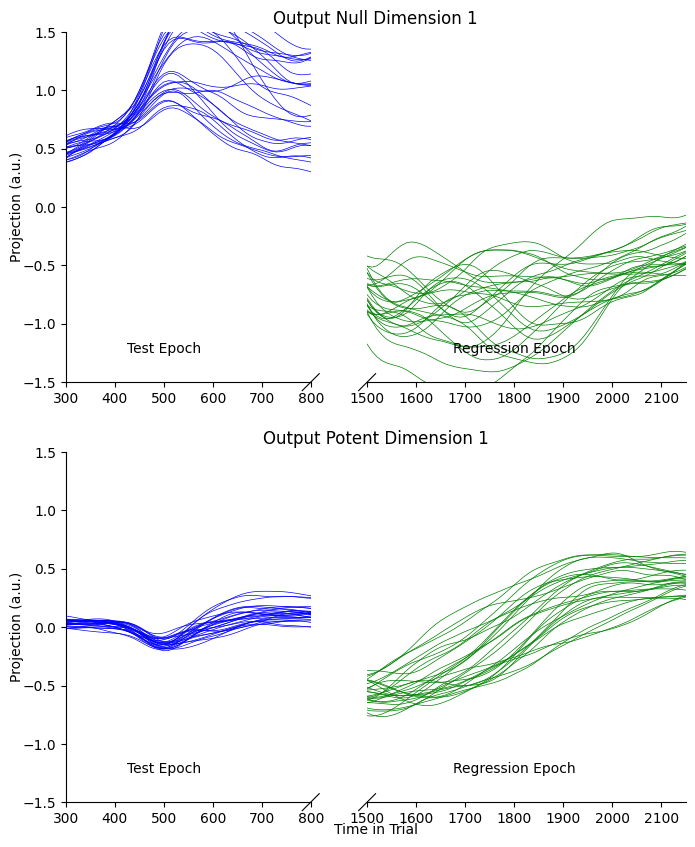

(array([[ 0.08445498,  0.00634071, -0.02613609],
        [-0.42551262,  0.10657494,  0.04910011],
        [-0.03786445, -0.17905437,  0.22995982],
        [-0.03614647, -0.26083569, -0.14308333],
        [ 0.23611586,  0.08578547, -0.10984675],
        [-0.0514427 , -0.13282198,  0.04699125]]),
 array([[-0.37265904,  0.18917423,  0.17278221],
        [-0.37328164,  0.18345582,  0.17542454],
        [-0.37469598,  0.1761843 ,  0.17730391],
        ...,
        [ 0.4018328 , -0.09706933,  0.22169647],
        [ 0.4034433 , -0.09886454,  0.2078682 ],
        [ 0.40261716, -0.09986605,  0.19500693]], shape=(1782, 3)),
 array([[ 1.32988004e-01,  9.75105644e-02,  9.89390330e-03, ...,
          8.26220148e-02,  2.43527845e-02, -1.44103423e-01],
        [ 1.32647274e-01,  9.74123185e-02,  7.40682799e-03, ...,
          8.27561708e-02,  2.44608591e-02, -1.42955339e-01],
        [ 1.32324228e-01,  9.74774649e-02,  4.22484504e-03, ...,
          8.29146653e-02,  2.45231611e-02, -1.41253079e-01],


In [9]:
pcar.fig_4(J_all_tensor[27:54,:,:], J_mus_tensor, plot = True)

>>> best_lam returning: 48.32930238571752


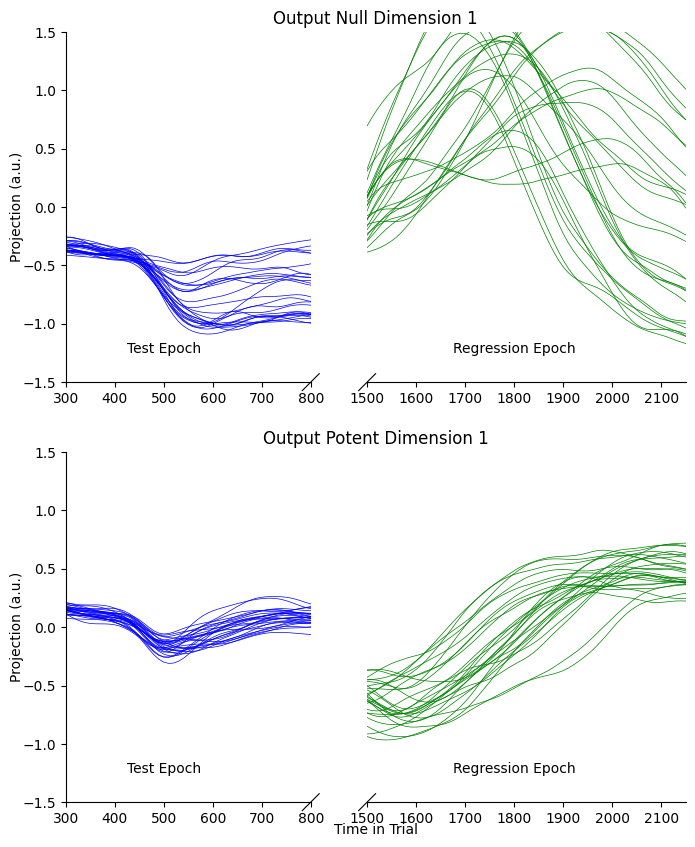

(array([[ 6.23770751e-02, -3.63679592e-02, -1.42842904e-04],
        [-1.26852213e-01,  8.97535672e-02, -1.36331391e-01],
        [-5.18947315e-01,  3.46449204e-02,  1.79128862e-01],
        [ 7.91128555e-02,  4.25563381e-03,  1.96916659e-01],
        [-2.04303657e-01, -7.73075455e-02, -5.12231012e-02],
        [-8.26638115e-02,  1.83118676e-02, -8.59769968e-02]]),
 array([[-0.58594133,  0.04203638,  0.22872036],
        [-0.56160519,  0.03339063,  0.24147439],
        [-0.53498639,  0.02545626,  0.25290541],
        ...,
        [ 0.39315984, -0.14098684, -0.04280135],
        [ 0.39015162, -0.14316671, -0.04534246],
        [ 0.38811661, -0.14485133, -0.04775554]], shape=(1782, 3)),
 array([[ 0.17906152,  0.14534096, -0.08323781, ...,  0.11844945,
          0.03215251, -0.13688119],
        [ 0.17183347,  0.13858377, -0.08362716, ...,  0.11507525,
          0.03212774, -0.13384991],
        [ 0.16398553,  0.13130021, -0.0833246 , ...,  0.11123297,
          0.03196223, -0.13046714],


In [10]:
pcar.fig_4(J_all_tensor[54:81,:,:], J_mus_tensor, plot = True)

>>> best_lam returning: 0.01


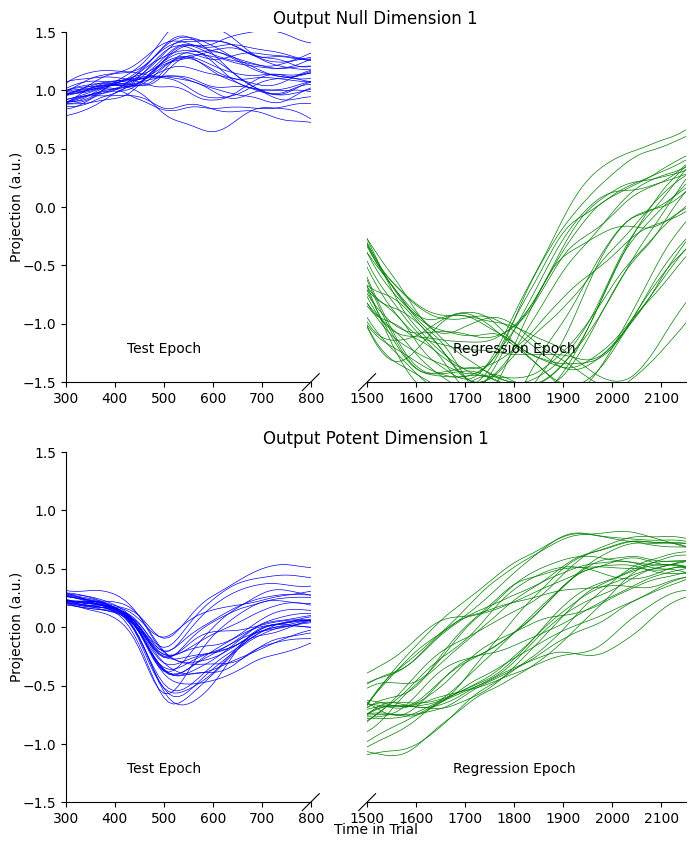

(array([[ 0.08521433, -0.0054697 , -0.01364555],
        [ 0.53352637,  0.20031444, -0.02731031],
        [-0.30670938,  0.32898144, -0.10484722],
        [ 0.0783216 ,  0.19853834,  0.26520854],
        [-0.01251701,  0.10140606,  0.0187321 ],
        [-0.1574492 , -0.06397194, -0.04898598]]),
 array([[-0.66929452,  0.28034192, -0.04507921],
        [-0.61215328,  0.30550733, -0.01595618],
        [-0.55445688,  0.3314851 ,  0.01249568],
        ...,
        [ 0.30066834, -0.40924419,  0.13920508],
        [ 0.30976449, -0.39304333,  0.13915849],
        [ 0.31652395, -0.3793885 ,  0.13705806]], shape=(1782, 3)),
 array([[ 0.21680385,  0.18072529,  0.01215892, ...,  0.1183583 ,
          0.02052876, -0.1630468 ],
        [ 0.20481057,  0.16646222,  0.02925726, ...,  0.1118046 ,
          0.02102921, -0.17006001],
        [ 0.19272181,  0.15210096,  0.04679417, ...,  0.10512955,
          0.02148198, -0.1771132 ],
        ...,
        [-0.12345429, -0.09363073, -0.12342658, ..., -0.052

In [11]:
pcar.fig_4(J_all_tensor[81:108,:,:], J_mus_tensor, plot = True)